In [1]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import struct

%matplotlib inline  

In [3]:
#file = open('../../../out/zeroOT_99.out','rb')
file = open('../../smaug_jet_data/out/out/zeroOT_60.out','rb')


file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)
nit = fromfile(file,dtype=int32,count=1)
t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)
ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
varbuf = fromfile(file,dtype=float,count=6)[:6]
varnames = file.read(79)

#typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;

alldat=fromfile(file,dtype=float,count=(nw+ndim)*ndata[0]*ndata[1])[:(nw+ndim)*ndata[0]*ndata[1]]
if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]:
    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1])
alldat=np.reshape(alldat,(nw+ndim,ndata[0],ndata[1],),'C')

file.close()

TypeError: only integer scalar arrays can be converted to a scalar index

In [11]:
#file = open('../../../out/zeroOT_99.out','rb')
file = open('../../smaug_jet_data/out/out/zeroOT_10.out','rb')

file.seek(0,2)
eof = file.tell()
file.seek(0,0)

ndata=[0,0]

name = file.read(79)
nit = fromfile(file,dtype=int32,count=1)
t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)
ndata[0]=fromfile(file,dtype=int32,count=1)
ndata[1]=fromfile(file,dtype=int32,count=1)
#ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
varbuf = fromfile(file,dtype=float,count=6)[:6]
varnames = file.read(79)


icount=(nw+ndim)*ndata[0]*ndata[1]
print(icount)
alldat=fromfile(file,dtype=float64,count=786432)
alldat=np.reshape(alldat,(12,256,256,),'C')


#typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;

#alldat=fromfile(file,dtype=float,count=(nw+ndim)*ndata[0]*ndata[1])[:(nw+ndim)*ndata[0]*ndata[1]]
#if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]:
#    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1])
#alldat=np.reshape(alldat,(nw+ndim,ndata[0],ndata[1],),'C')

file.close()

[786432]


In [12]:
print( 'varnames:',varnames)
print( 'nit:',nit)
print ('name:',name)
print( 't:',t)
print( 'ndim:',ndim)
print( 'neqpar:',neqpar)
print( 'nw:',nw)
print( 'varbuf:',varbuf)

varnames: b'x y rho mx my e bx by  gamma eta g1 g2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x90u\x00+\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb8\x03\x00\x00\x00\x00\x00'
nit: [10]
name: b'test1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
t: [0.0022]
ndim: [2]
neqpar: [6]
nw: [10]
varbuf: [1.66667 0.      0.      0.      0.      0.     ]


/Users/mikegriffiths/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


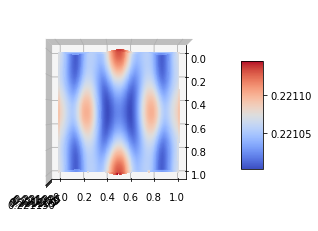

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = alldat[0,:,:]
Y = alldat[1,:,:]


dens = alldat[2,:,:]
#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, dens, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

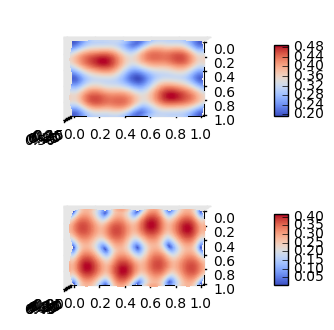

In [12]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(2, 1, 1,projection='3d')

#X = alldat[0,:,:]
#Y = alldat[1,:,:]


energy = alldat[5,:,:]
bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, energy, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)



ax = fig.add_subplot(2, 1, 2,projection='3d')
surf = ax.plot_surface(X, Y, bmag, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()